# Final Perform

This is the final perform. This notebook is serves as a template for how you should structure your final submission. There are no autograded tests for this Perform. You should also feel free to add more cells and move sections around if you believe it will improve the cohesion of the assignment.

The data is in RateMyProfessorSampleData.zip. You will need to unzip the file to access the data files. The data is a [sample data dump from RateMyProfessor.com](https://data.mendeley.com/datasets/fvtfjyvw7d/2).

When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct before saving and submitting your .ipynb file (the notebook file) on gradescope. There is no autograder for this Perform. It is entirely manually graded.

In [1]:
# Run this code cell to import relevant libraries
# Feel free to add any other libraries here or later in your notebook
# Please update to seaborn v0.11 for this assignment
# check version: print(sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set_theme()

print(sns.__version__)

0.11.0


# Introduction

*Add text here if you would like to provide an introduction to your analysis that will add to the notebook's cohesion*

# Data Processing

This section should have all of your data loading and cleaning code where you load and create your DataFrame(s). It does not need to contain all of the data processing code if creating a new column or table in a later section makes more sense for explanation and cohesion.

In [2]:
import glob
import os

# function that parses the individual csv files into the necessary format
def parseFile(file):
    df = pd.read_csv(file)
    avg_rating = np.mean(df['student_star'])
    df['avg_rating'] = avg_rating
    #df = df.drop_duplicates(subset = ['professor_name'])
    df = df[['professor_name', 'local_name', 'state_name', 'avg_rating', 'student_star']]
    return df

# merging the files into one dataframe
joined_files = os.path.join("RateMyProfessorSampleData", "data*.csv")
#joined_files = os.path.join("/Users/gerbe/Downloads/RateMyProfessorSampleData", "data*.csv")
joined_list = glob.glob(joined_files)
df = pd.concat(map(parseFile, joined_list), ignore_index=True)
print(df.head())

  professor_name local_name state_name  avg_rating  student_star
0    Mimi  Kline    Newtown         PA    5.000000           5.0
1  Dennis  Jones    Turlock         CA    4.236842           4.0
2  Dennis  Jones    Turlock         CA    4.236842           1.0
3  Dennis  Jones    Turlock         CA    4.236842           3.5
4  Dennis  Jones    Turlock         CA    4.236842           2.5


In [3]:
print(df.shape)

(19685, 5)


In [193]:
# We add a region label to the each row
# N - North East W - West M - Mid West S - South O - Other
region_map = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}
df['state_name'] = df['state_name'].str.replace(' ', '')
df['region'] = df['state_name'].map(region_map)

In [194]:
df.head()

,professor_name,local_name,state_name,avg_rating,student_star,region,population
0,Mimi Kline,Newtown,PA,5.000000,5.0,N,NaN
1,Dennis Jones,Turlock,CA,4.236842,4.0,W,4300.0
2,Dennis Jones,Turlock,CA,4.236842,1.0,W,4300.0
3,Dennis Jones,Turlock,CA,4.236842,3.5,W,4300.0
4,Dennis Jones,Turlock,CA,4.236842,2.5,W,4300.0


# Visualization

This section should contain at least one visualization showing something informative about the data. The skills you learned for this section primarily come from Module 5B.

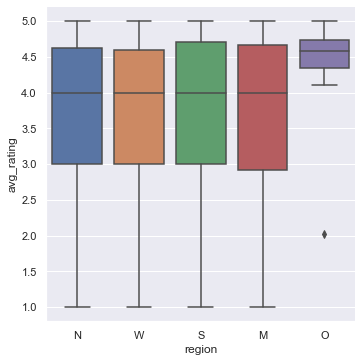

In [195]:
# average ratings for each region 
sns.catplot(data = df1, x = 'region', y = 'avg_rating', kind='box')

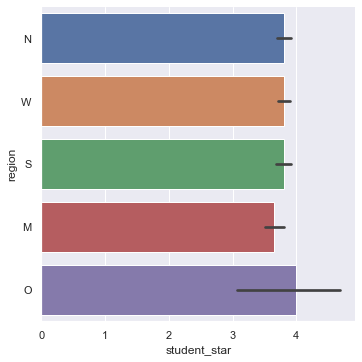

In [196]:
sns.catplot(data = df1, x = 'student_star', y = 'region', kind = 'bar')

Summary statistics of average ratings for region N
count    5435.000000
mean        3.825023
std         0.935441
min         1.000000
25%         3.236111
50%         4.075000
75%         4.600000
max         5.000000
Name: avg_rating, dtype: float64
Summary statistics of average ratings for region W
count    6285.000000
mean        3.779962
std         0.915007
min         1.000000
25%         3.125000
50%         4.000000
75%         4.500000
max         5.000000
Name: avg_rating, dtype: float64
Summary statistics of average ratings for region S
count    4007.000000
mean        3.744094
std         0.954294
min         1.000000
25%         3.091667
50%         3.928571
75%         4.500000
max         5.000000
Name: avg_rating, dtype: float64
Summary statistics of average ratings for region M
count    2397.000000
mean        3.683790
std         0.986001
min         1.000000
25%         3.000000
50%         3.928571
75%         4.545455
max         5.000000
Name: avg_rating, dtype: 

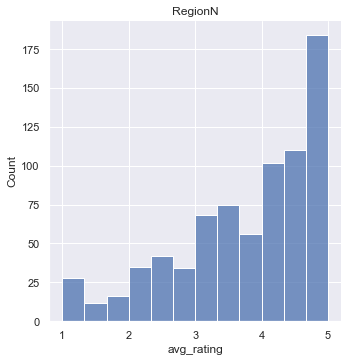

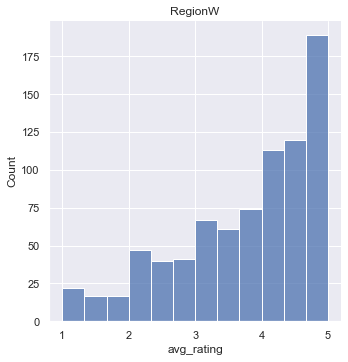

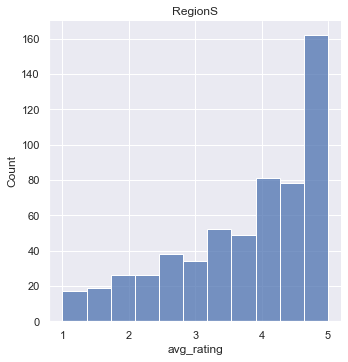

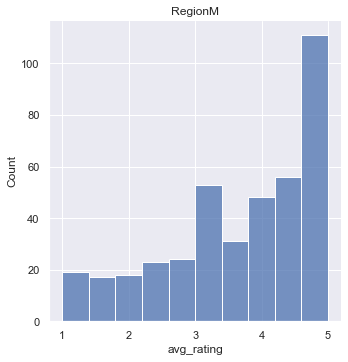

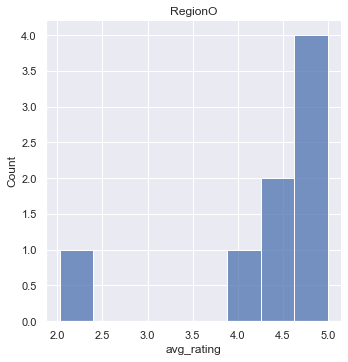

In [208]:
# visualization of the distribution of each regions ratings 
regions = ['N', 'W','S','M','O']
for r in regions:
    sns.displot(data = df1[df1['region'] == r], x = 'avg_rating')
    plt.title('Region ' + r)
    print('Summary statistics of average ratings for region ' + r)
    print(df[df['region'] == r].describe()['avg_rating'])

# Hypothesis Test

This section should contain at least one hypothesis test about the data. The skills you learned for this section primarily came from Module 3B.

In [28]:
H_df = df1 #create a df for the hypothesis test section
MWonly = H_df[H_df['region'] == 'M']
NEonly = H_df[H_df['region'] == 'N']
result = stats.ttest_ind_from_stats(mean1 = np.mean(MWonly['student_star']), std1 = np.std(MWonly['student_star']), nobs1 = len(MWonly['student_star']),
                                 mean2 = np.mean(NEonly['student_star']), std2 = np.std(NEonly['student_star']), nobs2 = len(NEonly['student_star']))

print("the p value is {}".format(result.pvalue))

the p value is 4.126449923004665e-05


For a test of two means, we can use ttest_ind_from_stats.

The null hypothesis is that the average star rating for a professor is not different between the Midwest region and the Northeast region. 

The alternative hypothesis is that the average star rating for a professor IS different between these two regions. 

Since the p-value is far below 0.05, we can reject the null hypothesis that the average star rating for professors is the same between the Midwest region and the Northeast region.

# Prediction

This section should contain the creation and testing of at least one model. The skills you learned for this section primarily came from Module 6.

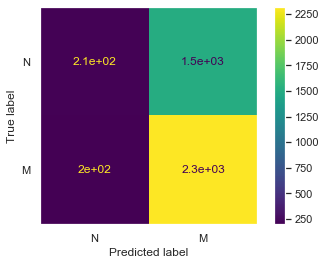

[[ 212 1509]
 [ 198 2321]]
There are 1509 false positives and 198 false negatives
The accuracy score is 0.5974056603773585


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # just to format confusion matrix

# ratings that come from the NorthEast or Midwest
both = df1[(df1['region'] == 'N') | (df1['region'] == 'M')]
both = both.dropna()
# making predictions based on all the 
data = both[['avg_rating']].values
target = both['region'].values
logistic_model = LogisticRegression()
logistic_model.fit(X=data, y = target)

both['predicted_region'] = logistic_model.predict(data)

cf = confusion_matrix(both['region'],both['predicted_region'])
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=both["region"].unique())
disp.plot()
plt.grid(False) #gets rid of white lines
plt.show()
print(cf) # plaintext version of confusion matrix

print("There are {} false positives and {} false negatives".format(cf[0][1], cf[1][0]))

score = accuracy_score(both['region'], both['predicted_region']) # The accuracy score of the prediction
print("The accuracy score is {}".format(score))

In [94]:
df2 = df1.dropna()
data = df2[['student_star']]
target = df2['region']
from sklearn.model_selection import train_test_split
# splitting the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.4, random_state=1)

In [95]:
print(df2.shape)

print(df2.head())
print(train_data)

(12076, 7)
  professor_name local_name state_name  avg_rating  student_star region  \
1  Dennis  Jones    Turlock         CA    4.236842           4.0      W   
2  Dennis  Jones    Turlock         CA    4.236842           1.0      W   
3  Dennis  Jones    Turlock         CA    4.236842           3.5      W   
4  Dennis  Jones    Turlock         CA    4.236842           2.5      W   
5  Dennis  Jones    Turlock         CA    4.236842           5.0      W   

   population  
1      4300.0  
2      4300.0  
3      4300.0  
4      4300.0  
5      4300.0  
       student_star
18934           5.0
5715            5.0
7786            5.0
13906           5.0
3708            3.0
...             ...
12670           2.0
17762           4.0
1490            5.0
8561            5.0
404             2.0

[7245 rows x 1 columns]


In [96]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params_to_try = {'n_neighbors': range(1, 30)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_to_try)
knn_search.fit(train_data, train_target)
q4_n = knn_search.best_params_
q4_score = knn_search.score(test_data, test_target)
# Leave this line here to print the result
print("Optimal n_neighors:", q4_n)
print("Accuracy on training data:", knn_search.score(train_data, train_target))
print("Accuracy on testing data:", q4_score)


Optimal n_neighors: {'n_neighbors': 27}
Accuracy on training data: 0.4104899930986888
Accuracy on testing data: 0.42165183191885736


# Additional Analysis

This section should contain one more analysis of your choosing. It can be like any of the other analysis sections.

For additional hypothesis testing, we can do a test of more than two means, called ANOVA testing. 

The null hypothesis is that the average star rating for a professor is not different between any of the five regions. 

The alternative hypothesis is that the average star rating for a professor IS different between at least two of these five regions. 

As we can see below, the p value that we obtain from ANOVA testing is less than 0.05, so we can reject the null hypothesis that all regions have the same average star rating given to a professor. 

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('student_star ~ region', data = H_df).fit()
aov_table = sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                sum_sq       df         F    PR(>F)
region       44.319380      4.0  5.584266  0.000173
Residual  36103.021563  18196.0       NaN       NaN


# Conclusion

Our main goal was to analyze the correlation between the geographical regions of the United States and other factors in the data set, primarily the number of stars given to a professor. First, our visualizations showed minor differences between each region's distribution of stars given as well as summary statistics. Second, in our initial hypothesis test we were able to reject the null hypothesis that the Midwest region's professors have the same average star rating as the Northeast region's professors. We also used ANOVA analysis in our additional analysis section to reject the null hypothesis that all regions have the same average star rating. Lastly, though our model did not prove to be exceedingly accurate, we used a logistic prediction model to predict which region between the Northeast and Midwest a professor was from based off of star rating and city population. 